We shall start by importing the essential Python libraries. 

In [1]:
### IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
pd.options.mode.chained_assignment = None

Next, we import the data and display the top 10 rows.

In [2]:
### IMPORTING DATA
flightfare = pd.read_excel('Data_Train.xlsx')
flightfare.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


We identify 'Price' as our target variable as we are trying to predict the price of flight tickets.  


Let us now see the dimensions of this dataset.

In [3]:
flightfare.shape

(10683, 11)

So, we have 10683 samples and 11 features. Of the 11 features, we have 'Price' as our target which leaves us with 10 features that will to be used to predict the outcome. 


Next, let us look at the datatypes of each of these features.

In [4]:
flightfare.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

This tells us that the dataset has just 1 numerical datatype and 10 object datatypes. Of the 10 object datatypes, 'Date_of_Journey' is obviously a date while both 'Dep_Time' and 'Arrival_Time' are timestamps. 


Next, let us look at the statistical attributes of the only numerical datatype, 'Price'.

In [5]:
flightfare.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


If we compare the mean to the median(50%), we see that the former is higher than the latter, indicating the presence of outliers. Also the range of values, calculated as (max - min), seems very high.


Now, let's create a pandas dataframe from this dataset.

In [6]:
### CREATING A PANDAS DATAFRAME
df = pd.DataFrame(flightfare)
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


Now, we shall start analysing our data. We do this by first taking one variable at a time, followed by two and then a combination of more variables. Also, since we have both continuous and categorical variables in our dataframe, it would be wise to do the analysis separately for those two types.


So, we shall start by looking at the categorical features. We perform Univariate Analysis by making barplots which will show us the number of samples which fall under the different levels of a categorical variable.

Text(0, 0.5, '')

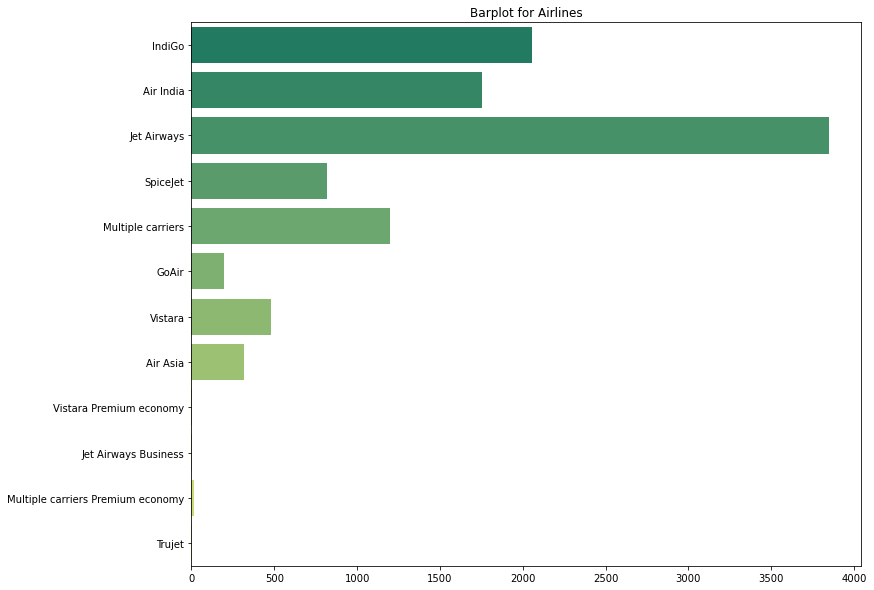

In [7]:
### UNIVARIATE ANALYSIS - CATEGORICAL
plt.figure(figsize = (12, 10))
sns.countplot(y = 'Airline', data = df, palette = 'summer')
plt.title('Barplot for Airlines')
plt.xlabel('')
plt.ylabel('')

We see that in our dataset, _'Jet Airways'_ flights were booked the most, followed by _'IndiGo'_, _'Air India'_, _'Multiple carriers'_, _'SpiceJet'_ and _'Vistara'_. 

Text(0, 0.5, '')

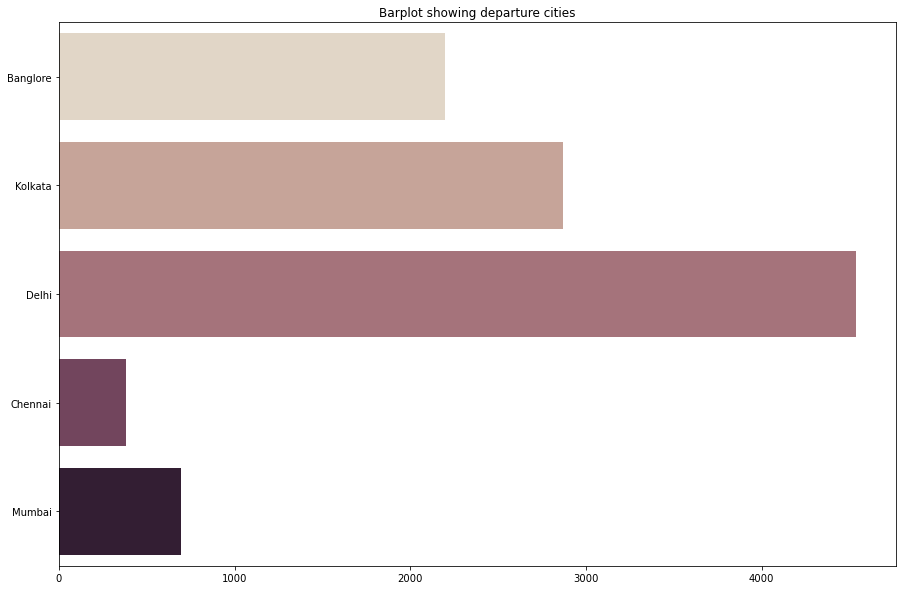

In [8]:
plt.figure(figsize = (15, 10))
sns.countplot(y = 'Source', data = df, palette = 'ch:.25')
plt.title('Barplot showing departure cities')
plt.xlabel('')
plt.ylabel('')

For 'Departure' city, most of the flights were booked to leave _'Delhi'_, followed by _'Kolkata'_, _'Banglore'_, _'Mumbai'_ and _'Chennai'_.

Text(0, 0.5, '')

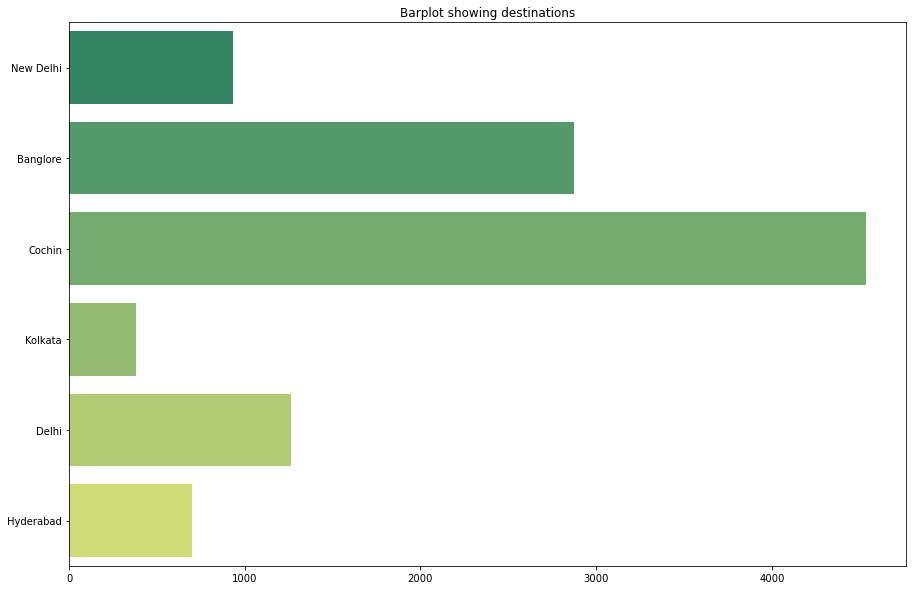

In [9]:
plt.figure(figsize = (15, 10))
sns.countplot(y = 'Destination', data = df, palette = 'summer')
plt.title('Barplot showing destinations')
plt.xlabel('')
plt.ylabel('')

For the 'Destination' city, we see an error in that _'New Delhi'_ and _'Delhi'_ are shown as two separate cities. Let us correct this before we move further.

Text(0, 0.5, '')

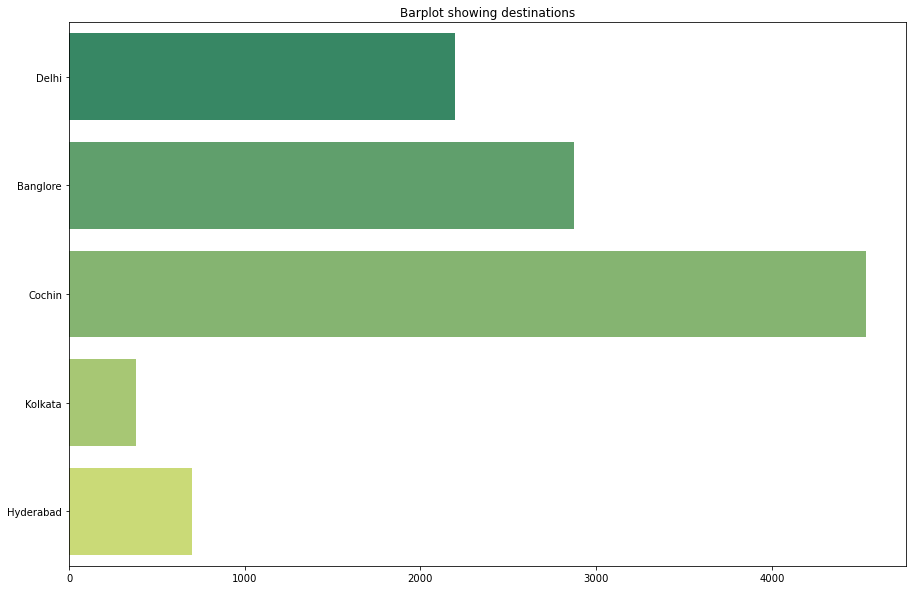

In [10]:
df['Destination'] = df['Destination'].replace('New Delhi', 'Delhi')
plt.figure(figsize = (15, 10))
sns.countplot(y = 'Destination', data = df, palette = 'summer')
plt.title('Barplot showing destinations')
plt.xlabel('')
plt.ylabel('')

So, we see that _'Cochin'_ was used as destination the most, then came _'Banglore'_, followed by _'Delhi'_, _'Hyderabad'_ and _'Kolkata'_.

Text(0, 0.5, '')

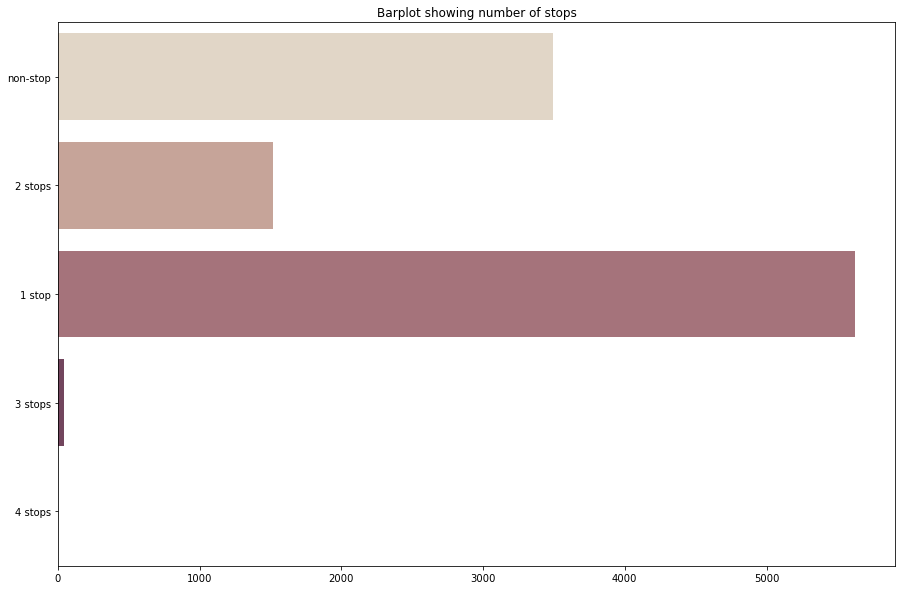

In [11]:
plt.figure(figsize = (15, 10))
sns.countplot(y = 'Total_Stops', data = df, palette = 'ch:.25')
plt.title('Barplot showing number of stops')
plt.xlabel('')
plt.ylabel('')

We see that most of the flights had a stop in its route. Number of non-stop flights was also high but less than flights with one stop. Decent amount of flights had two stops while there were only few with more than two.

Text(0, 0.5, '')

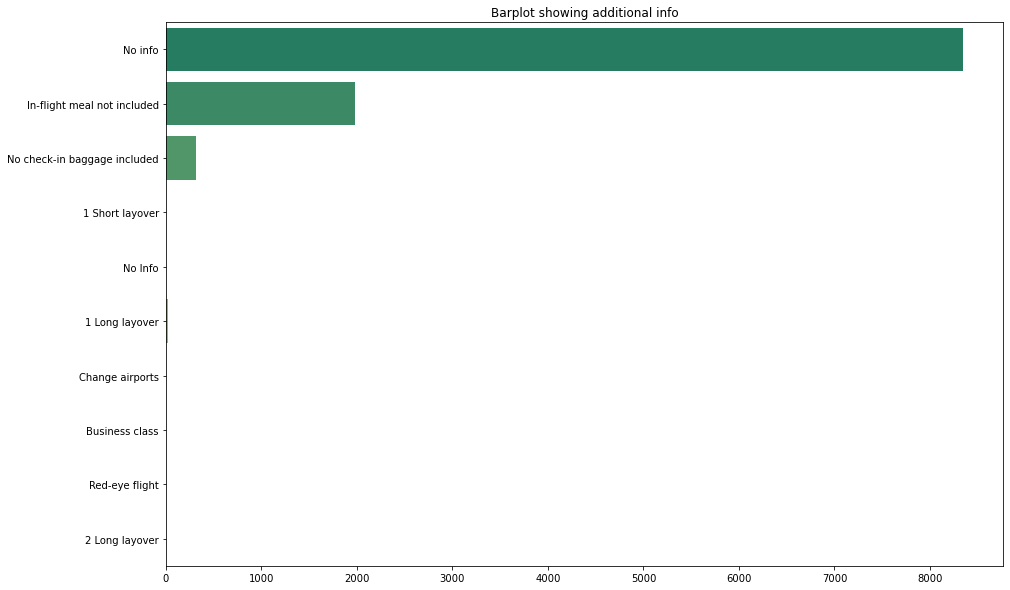

In [12]:
plt.figure(figsize = (15, 10))
sns.countplot(y = 'Additional_Info', data = df, palette = 'summer')
plt.title('Barplot showing additional info')
plt.xlabel('')
plt.ylabel('')

An overwhemling number of rows dont have additional information, therefore we can remove this feature from our dataframe.


For now, we are done with variable analysis. Next, we shall move on to perform feature engineering to get features that will help us to get good predictions. 

In [13]:
### FEATURE ENGINEERING
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


We start by changing the 'Date_of_Journey' object feature to a datetime feature.

In [14]:
# Changing 'Date_of_Journey' object to datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format = '%d/%m/%Y')
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,2019-03-12,Banglore,Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,2019-03-01,Banglore,Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,2019-03-12,Banglore,Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


Then, we extract the weekday('Weekday_of_Journey'), date('Day_of_Journey') and month('Month_of_Journey') of journey from this 'Date_of_Journey' feature and drop the parent feature since it is now redundant.

In [15]:
# Extracting day, date and month from 'Date_of_Journey'
df['Weekday_of_Journey'] = df['Date_of_Journey'].dt.weekday
df['Day_of_Journey'] = df['Date_of_Journey'].dt.day
df['Month_of_Journey'] = df['Date_of_Journey'].dt.month
df.drop(['Date_of_Journey'], axis = 1, inplace = True)
df.head(10)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Weekday_of_Journey,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,6,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,6,12,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,4,1,3
5,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,0,24,6
6,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,1,12,3
7,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,4,1,3
8,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,1,12,3
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625,0,27,5


Now, we use the 'Weekday_of_Journey' feature to get a feature('Weekend_Journey') which tells us if the journey took place on a weekend. This is significant because flight tickets generally tend to be expensive on weekends than on weekdays. We then drop the parent feature.

In [16]:
# Creating feature for weekend travel
df['Weekend_Journey'] = np.where(df['Weekday_of_Journey'] >= 5, 1, 0)
df.drop(['Weekday_of_Journey'], axis = 1, inplace = True)
df.head(10)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Weekend_Journey
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,1
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,1
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,0
5,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6,0
6,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,12,3,0
7,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,1,3,0
8,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,12,3,0
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625,27,5,0


Next, we separate the hour('Dep_Hour') and minutes('Dep_Mins') from the 'Dep_Time' feature and drop the parent feature.

In [17]:
# Extracting hour and minutes from 'Dep_Time'
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time'], format = '%H:%M').dt.hour
df['Dep_Mins'] = pd.to_datetime(df['Dep_Time'], format = '%H:%M').dt.minute
df.drop(['Dep_Time'], axis = 1, inplace = True)
df.head(10)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Weekend_Journey,Dep_Hour,Dep_Mins
0,IndiGo,Banglore,Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,1,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,0,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,1,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,1,18,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,0,16,50
5,SpiceJet,Kolkata,Banglore,CCU → BLR,11:25,2h 25m,non-stop,No info,3873,24,6,0,9,0
6,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,12,3,0,18,55
7,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,05:05 02 Mar,21h 5m,1 stop,No info,22270,1,3,0,8,0
8,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,12,3,0,8,55
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,19:15,7h 50m,1 stop,No info,8625,27,5,0,11,25


In the 'Arrival_Time' feature, we see that some of the timestamps have dates next to them which signify that the flight reached its destination a day after departure. We shall use this to create a new feature('Next_Day_Arrival').

In [18]:
# Creating feature for next day arrival
df['Next_Day_Arrival'] = 0
row_range = range(0, len(df))
for row in row_range: 
    df['Next_Day_Arrival'][row] = np.where((len(df['Arrival_Time'][row]) > 5), 1, 0)
df.head(10)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Weekend_Journey,Dep_Hour,Dep_Mins,Next_Day_Arrival
0,IndiGo,Banglore,Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,1,22,20,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,0,5,50,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,1,9,25,1
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,1,18,5,0
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,0,16,50,0
5,SpiceJet,Kolkata,Banglore,CCU → BLR,11:25,2h 25m,non-stop,No info,3873,24,6,0,9,0,0
6,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,12,3,0,18,55,1
7,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,05:05 02 Mar,21h 5m,1 stop,No info,22270,1,3,0,8,0,1
8,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,12,3,0,8,55,1
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,19:15,7h 50m,1 stop,No info,8625,27,5,0,11,25,0


Just like with 'Dep_Time', we now extract the hour('Arrival_Hour') and minutes('Arrival_Mins') from the 'Arrival_Time' feature. We shall then drop the parent feature.

In [19]:
# Extracting hour and minutes from 'Arrival_Time'
df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_Mins'] = pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop(['Arrival_Time'], axis = 1, inplace = True)
df.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Weekend_Journey,Dep_Hour,Dep_Mins,Next_Day_Arrival,Arrival_Hour,Arrival_Mins
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,22,20,1,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,0,5,50,0,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,1,9,25,1,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,1,18,5,0,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,0,16,50,0,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,0,9,0,0,11,25
6,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,0,18,55,1,10,25
7,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,0,8,0,1,5,5
8,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,0,8,55,1,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,0,11,25,0,19,15


Next, if we look at the 'Duration' feature, we see that some rows have duration in terms of both hours and minutes while others have duration in terms of either of the two. So, we shall add '0h' to rows with only minutes duration and '0m' to rows with only hours duration. We do this so that it'll be easier to calculate the total duration in minutes for all the rows with a single formula.

In [20]:
# Transforming all 'Duration' values into a single format
row_range = range(0, len(df))
for row in row_range:
    if(len(df['Duration'][row]) <= 3):
        if 'h' in df['Duration'][row]:
            df['Duration'][row] = df['Duration'][row] + ' 0m'
        elif 'm' in df['Duration'][row]:
            df['Duration'][row] = '0h ' + df['Duration'][row]
df.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Weekend_Journey,Dep_Hour,Dep_Mins,Next_Day_Arrival,Arrival_Hour,Arrival_Mins
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,22,20,1,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,0,5,50,0,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,1,9,25,1,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,1,18,5,0,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,0,16,50,0,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,0,9,0,0,11,25
6,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,0,18,55,1,10,25
7,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,0,8,0,1,5,5
8,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,0,8,55,1,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,0,11,25,0,19,15


Then, we shall transform the duration by multiplying the hours by 60 and adding the adjacent minutes resulting in the total duration of the flight in terms of minutes. We then drop the parent feature.

In [21]:
# Creating a feature for duration in minutes
df['Duration_in_minutes'] = 0
row_range = range(0, len(df))
for row in row_range:
    df['Duration_in_minutes'][row] = (int(df['Duration'][row].split('h ')[0]) * 60) + int(df['Duration'][row].split('h ')[1].replace('m', ''))

df.drop(['Duration'], axis = 1, inplace = True)
df.head(10)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Weekend_Journey,Dep_Hour,Dep_Mins,Next_Day_Arrival,Arrival_Hour,Arrival_Mins,Duration_in_minutes
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,22,20,1,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,0,5,50,0,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,1,9,25,1,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,1,18,5,0,23,30,325
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,0,16,50,0,21,35,285
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,3873,24,6,0,9,0,0,11,25,145
6,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,12,3,0,18,55,1,10,25,930
7,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,1 stop,No info,22270,1,3,0,8,0,1,5,5,1265
8,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,12,3,0,8,55,1,10,25,1530
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,8625,27,5,0,11,25,0,19,15,470


Next, using the 'Route' feature, we shall create a new feature('Flight_Route') which shall take note of the most used routes. This new feature takes all the routes in the 'Route' feature and marks them as _'Direct'_ route if they only contain one arrow('→') else takes the same route value.  

In [22]:
# Creating feature for flight routes
df['Flight_Route'] = 0
x_values = range(0, len(df))
for x in x_values:
    route = str(df['Route'][x])
    stops = route.count('→')
    if (stops == 1):
        df['Flight_Route'][x] = 'Direct'
    else:
        df['Flight_Route'][x] = df['Route'][x]
df.head(10)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Weekend_Journey,Dep_Hour,Dep_Mins,Next_Day_Arrival,Arrival_Hour,Arrival_Mins,Duration_in_minutes,Flight_Route
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,22,20,1,1,10,170,Direct
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,0,5,50,0,13,15,445,CCU → IXR → BBI → BLR
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,1,9,25,1,4,25,1140,DEL → LKO → BOM → COK
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,1,18,5,0,23,30,325,CCU → NAG → BLR
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,0,16,50,0,21,35,285,BLR → NAG → DEL
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,3873,24,6,0,9,0,0,11,25,145,Direct
6,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,12,3,0,18,55,1,10,25,930,BLR → BOM → DEL
7,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,1 stop,No info,22270,1,3,0,8,0,1,5,5,1265,BLR → BOM → DEL
8,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,12,3,0,8,55,1,10,25,1530,BLR → BOM → DEL
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,8625,27,5,0,11,25,0,19,15,470,DEL → BOM → COK


Just to be sure, we can check the number of direct routes with the number of non-stop flights in the 'Total_Stops' feature.

In [23]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [24]:
df['Flight_Route'].value_counts()

Direct                         3491
DEL → BOM → COK                2376
CCU → BOM → BLR                 979
CCU → DEL → BLR                 565
BLR → BOM → DEL                 402
                               ... 
BLR → BOM → IXC → DEL             1
BOM → UDR → DEL → HYD             1
BLR → HBX → BOM → AMD → DEL       1
CCU → RPR → HYD → BLR             1
BOM → BBI → HYD                   1
Name: Flight_Route, Length: 124, dtype: int64

Next, from all the routes, we shall only consider the top five most travelled routes(six along with _'Direct'_) and signify the remaining ones as _'Other'_.

In [25]:
# Keeping only the top fives most used routes
top_routes = df['Flight_Route'].value_counts().index[:6]
df['Flight_Route'] = np.where(df['Flight_Route'].isin(top_routes), df['Flight_Route'], 'Other')
df.head(10)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Weekend_Journey,Dep_Hour,Dep_Mins,Next_Day_Arrival,Arrival_Hour,Arrival_Mins,Duration_in_minutes,Flight_Route
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,22,20,1,1,10,170,Direct
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,0,5,50,0,13,15,445,Other
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,1,9,25,1,4,25,1140,Other
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,1,18,5,0,23,30,325,Other
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,0,16,50,0,21,35,285,Other
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,3873,24,6,0,9,0,0,11,25,145,Direct
6,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,12,3,0,18,55,1,10,25,930,BLR → BOM → DEL
7,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,1 stop,No info,22270,1,3,0,8,0,1,5,5,1265,BLR → BOM → DEL
8,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,12,3,0,8,55,1,10,25,1530,BLR → BOM → DEL
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,8625,27,5,0,11,25,0,19,15,470,DEL → BOM → COK


Finally, we drop the 'Route' and 'Additional_Info' features to get our final set of features.

In [26]:
df.drop(['Route'], axis = 1, inplace = True)
df.drop(['Additional_Info'], axis = 1, inplace = True)
df.head(10)

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Weekend_Journey,Dep_Hour,Dep_Mins,Next_Day_Arrival,Arrival_Hour,Arrival_Mins,Duration_in_minutes,Flight_Route
0,IndiGo,Banglore,Delhi,non-stop,3897,24,3,1,22,20,1,1,10,170,Direct
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,0,5,50,0,13,15,445,Other
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,1,9,25,1,4,25,1140,Other
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,1,18,5,0,23,30,325,Other
4,IndiGo,Banglore,Delhi,1 stop,13302,1,3,0,16,50,0,21,35,285,Other
5,SpiceJet,Kolkata,Banglore,non-stop,3873,24,6,0,9,0,0,11,25,145,Direct
6,Jet Airways,Banglore,Delhi,1 stop,11087,12,3,0,18,55,1,10,25,930,BLR → BOM → DEL
7,Jet Airways,Banglore,Delhi,1 stop,22270,1,3,0,8,0,1,5,5,1265,BLR → BOM → DEL
8,Jet Airways,Banglore,Delhi,1 stop,11087,12,3,0,8,55,1,10,25,1530,BLR → BOM → DEL
9,Multiple carriers,Delhi,Cochin,1 stop,8625,27,5,0,11,25,0,19,15,470,DEL → BOM → COK


Next, we shall check the datatypes of the newly created features and change anything if necessary. 

In [27]:
df.dtypes

Airline                object
Source                 object
Destination            object
Total_Stops            object
Price                   int64
Day_of_Journey          int64
Month_of_Journey        int64
Weekend_Journey         int32
Dep_Hour                int64
Dep_Mins                int64
Next_Day_Arrival        int64
Arrival_Hour            int64
Arrival_Mins            int64
Duration_in_minutes     int64
Flight_Route           object
dtype: object

Here, we would like to have a common ground so we transform 'Weekend_Journey' to the same datatype as others.

In [28]:
df['Weekend_Journey'] = df['Weekend_Journey'].astype('int64')

Next, we shall check our data for missing values.

In [29]:
df.isna().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            1
Price                  0
Day_of_Journey         0
Month_of_Journey       0
Weekend_Journey        0
Dep_Hour               0
Dep_Mins               0
Next_Day_Arrival       0
Arrival_Hour           0
Arrival_Mins           0
Duration_in_minutes    0
Flight_Route           0
dtype: int64

Only one row has a value missing for 'Total_Stops'. For missing value treatment, we can either delete the rows with missing values or use imputation methods like KNN or mean imputation. Here, we shall do the former since there is only one row with missing value. 

In [30]:
df = df.dropna()
df.isna().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Price                  0
Day_of_Journey         0
Month_of_Journey       0
Weekend_Journey        0
Dep_Hour               0
Dep_Mins               0
Next_Day_Arrival       0
Arrival_Hour           0
Arrival_Mins           0
Duration_in_minutes    0
Flight_Route           0
dtype: int64

Before we go any further, let us store our feature names in a dictionary to make our task easier down the line.

In [31]:
num_vars = df.select_dtypes(include = ['int64'])
cat_vars = df.select_dtypes(include = ['object'])
feature_names = collections.defaultdict(str)
for name in num_vars.columns:
    feature_names[name]
for name in cat_vars.columns:
    feature_names[name]
feature_names

defaultdict(str,
            {'Price': '',
             'Day_of_Journey': '',
             'Month_of_Journey': '',
             'Weekend_Journey': '',
             'Dep_Hour': '',
             'Dep_Mins': '',
             'Next_Day_Arrival': '',
             'Arrival_Hour': '',
             'Arrival_Mins': '',
             'Duration_in_minutes': '',
             'Airline': '',
             'Source': '',
             'Destination': '',
             'Total_Stops': '',
             'Flight_Route': ''})

After missing value treatment, we once again move on to Univariate Analysis; this time it is for the continuous variables. We start by making boxplots for the variables to get a rough idea about the five number summary and the existing outliers.

<AxesSubplot:>

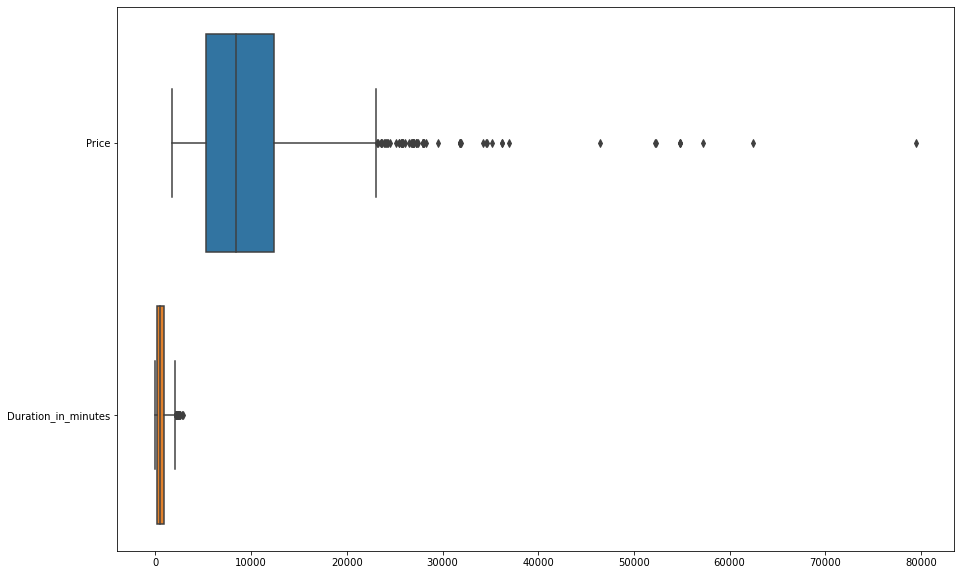

In [32]:
### UNIVARIATE ANALYSIS - CONTINUOUS
pair = num_vars[['Price', 'Duration_in_minutes']]
plt.figure(figsize = (15, 10))
sns.boxplot(data = pair, orient = 'h')

We see some outliers for the 'Price' feature.

We can dive deep into Univariate Analysis by plotting histograms.

Text(0, 0.5, '')

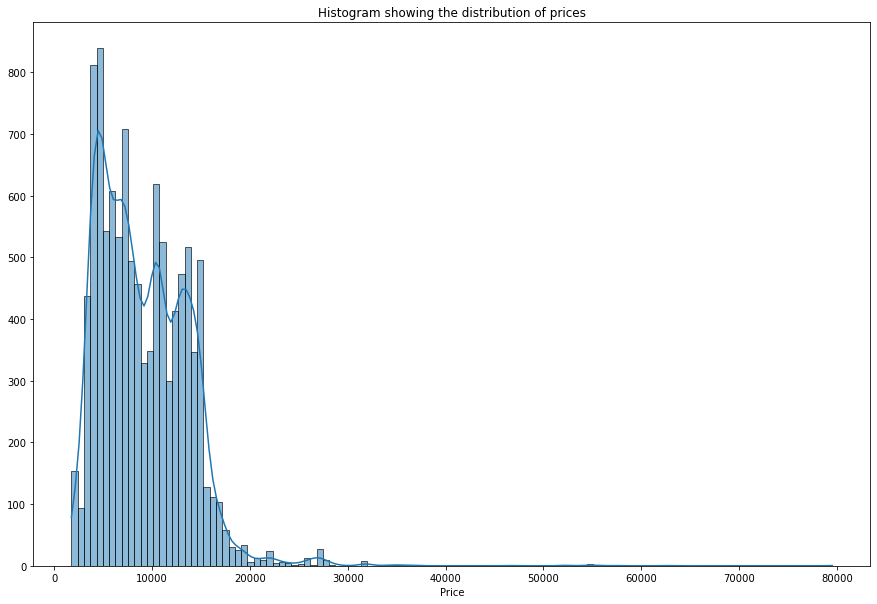

In [33]:
plt.figure(figsize = (15, 10))
sns.histplot(x = 'Price', data = df, kde = True)
plt.title('Histogram showing the distribution of prices')
plt.ylabel('')

The flight fare prices look skewed indicating the presence of outliers.

Text(0, 0.5, '')

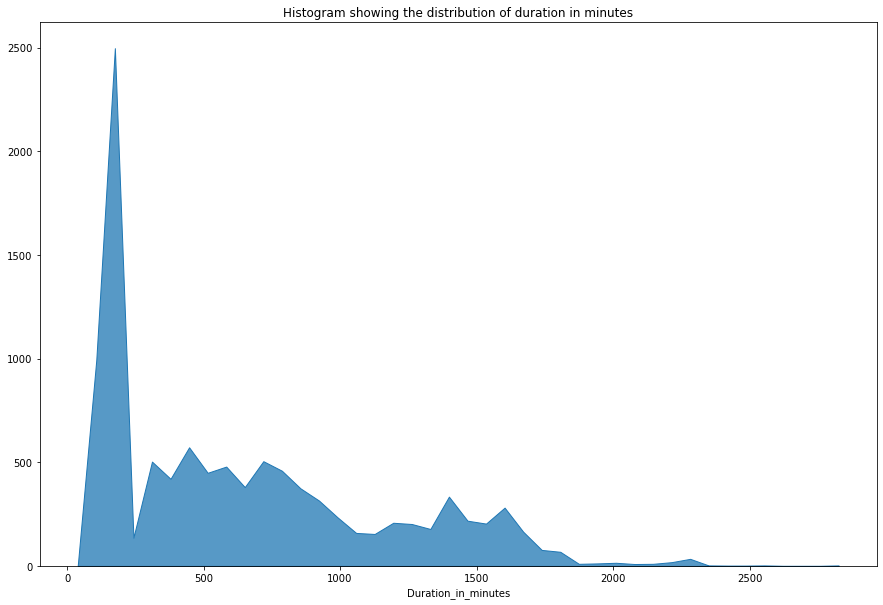

In [34]:
plt.figure(figsize = (15, 10))
sns.histplot(x = 'Duration_in_minutes', data = df, element = 'poly')
plt.title('Histogram showing the distribution of duration in minutes')
plt.ylabel('')

Next, we shall create a scatterplot matrix between the continuous variables which shows us the bivariate relationship in them.

<Figure size 3600x3600 with 0 Axes>

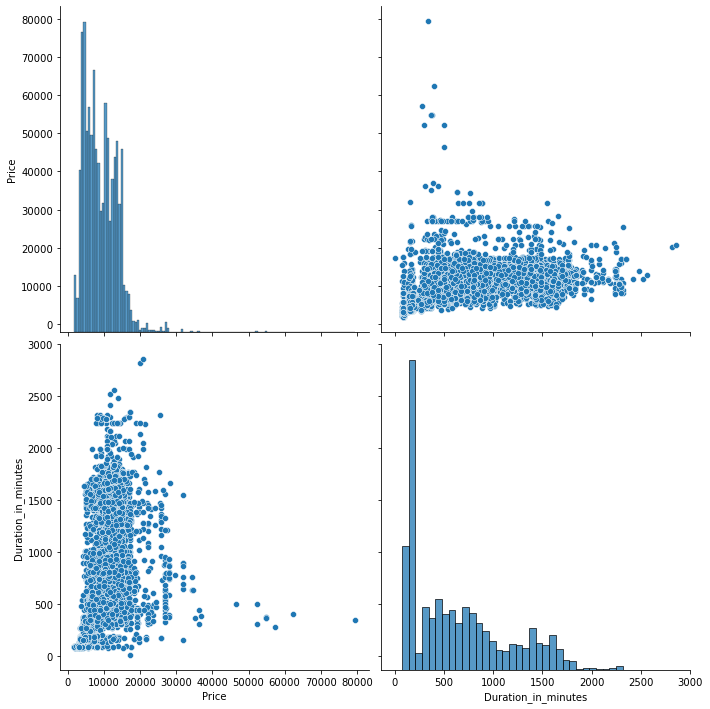

In [35]:
### BIVARIATE ANALYSIS - CONTINUOUS VS CONTINUOUS (SCATTERPLOT MATRIX)
plt.figure(figsize = (50, 50))
sns.pairplot(pair, height = 5)

Now, we shall go for outlier treatment. Again, there are any ways to do this. Here, we simply limit the variables between their resp 5th and 95th percentiles.

In [36]:
### OUTLIER TREATMENT
for col in df.columns:
    if col in pair.columns:
        percentile = df[col].quantile([0.05, 0.95]).values
        df[col] = df[col].clip(lower = percentile[0], upper = percentile[1])

Following outlier treatment, we shall start with the final part of variable analysis: the multivariate amalysis, wherein we take a mixture of continuous and categorical variables and examine the relationships between them.

Text(0.5, 1.0, 'Violinplot showing prices for different airline companies')

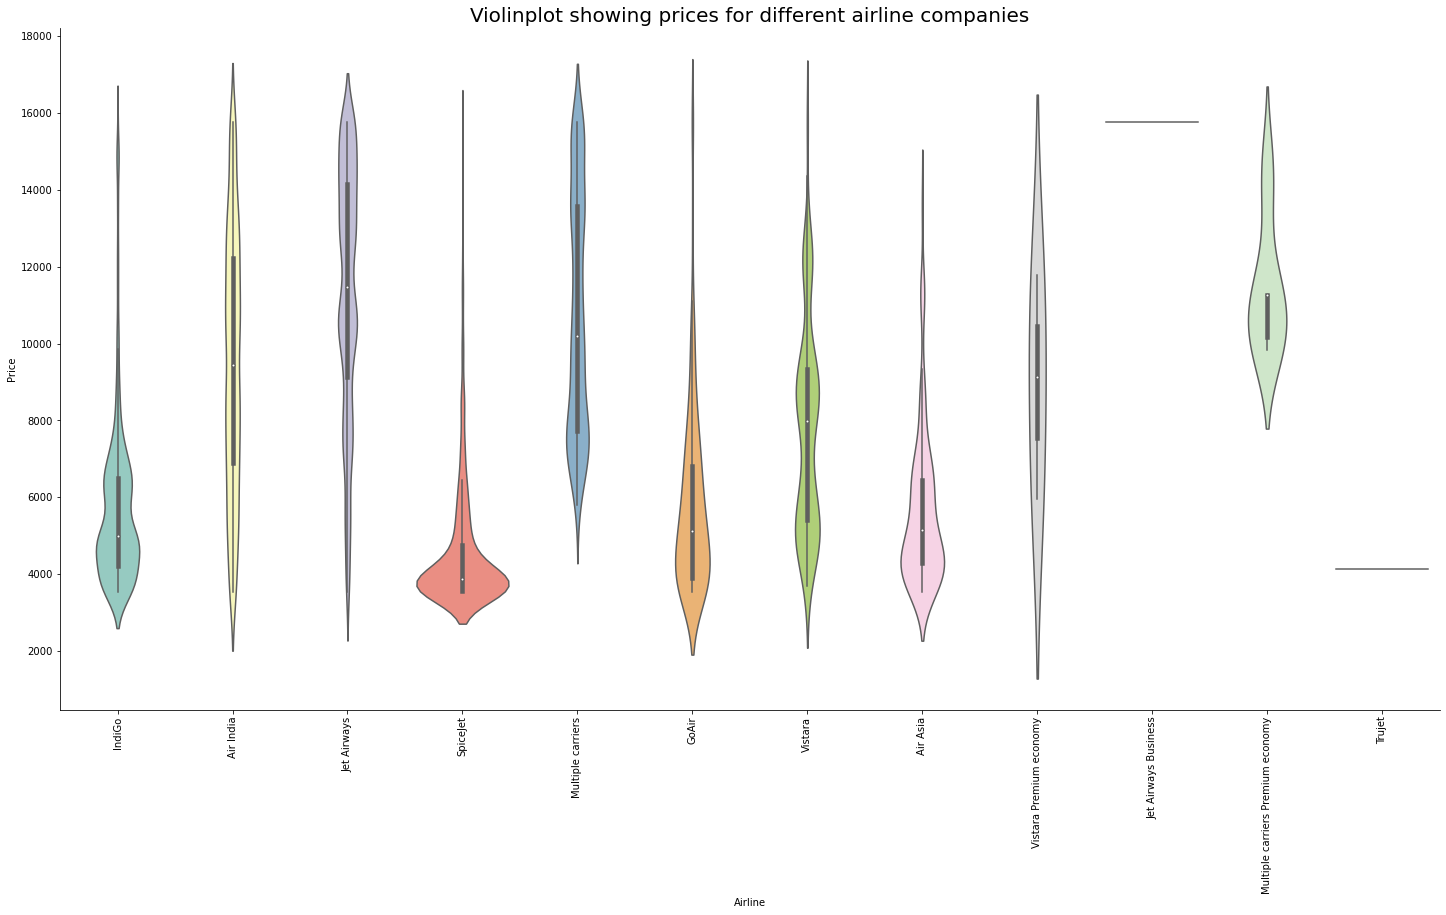

In [37]:
### BIVARIATE ANALYSIS - CATEGORICAL VS CONTINUOUS
plot = sns.catplot(x = 'Airline', y = 'Price', data = df, kind = 'violin', palette = 'Set3', height = 10, aspect = 2)
plot.set_xticklabels(rotation = 90)
plt.title('Violinplot showing prices for different airline companies', size = 20)

Here, we have plotted the price ranges for the different flight companies. We see that most of the flight ticktes belonging to _'IndiGo'_,_'Spicejet'_, _'GoAir'_, _'Vistara'_ and _'Air Asia'_ have price range around Rs.4000 while _'Jet Airways'_ has majority between Rs.14000 and Rs.16000. So, we can say that _'Jet Airways'_ flights are comparatively more expensive than the other flights while  _'IndiGo'_,_'Spicejet'_, _'GoAir'_, _'Vistara'_ and _'Air Asia'_ appear to be much cheaper. 

Text(0.5, 1.0, 'Violinplot showing prices for different sources')

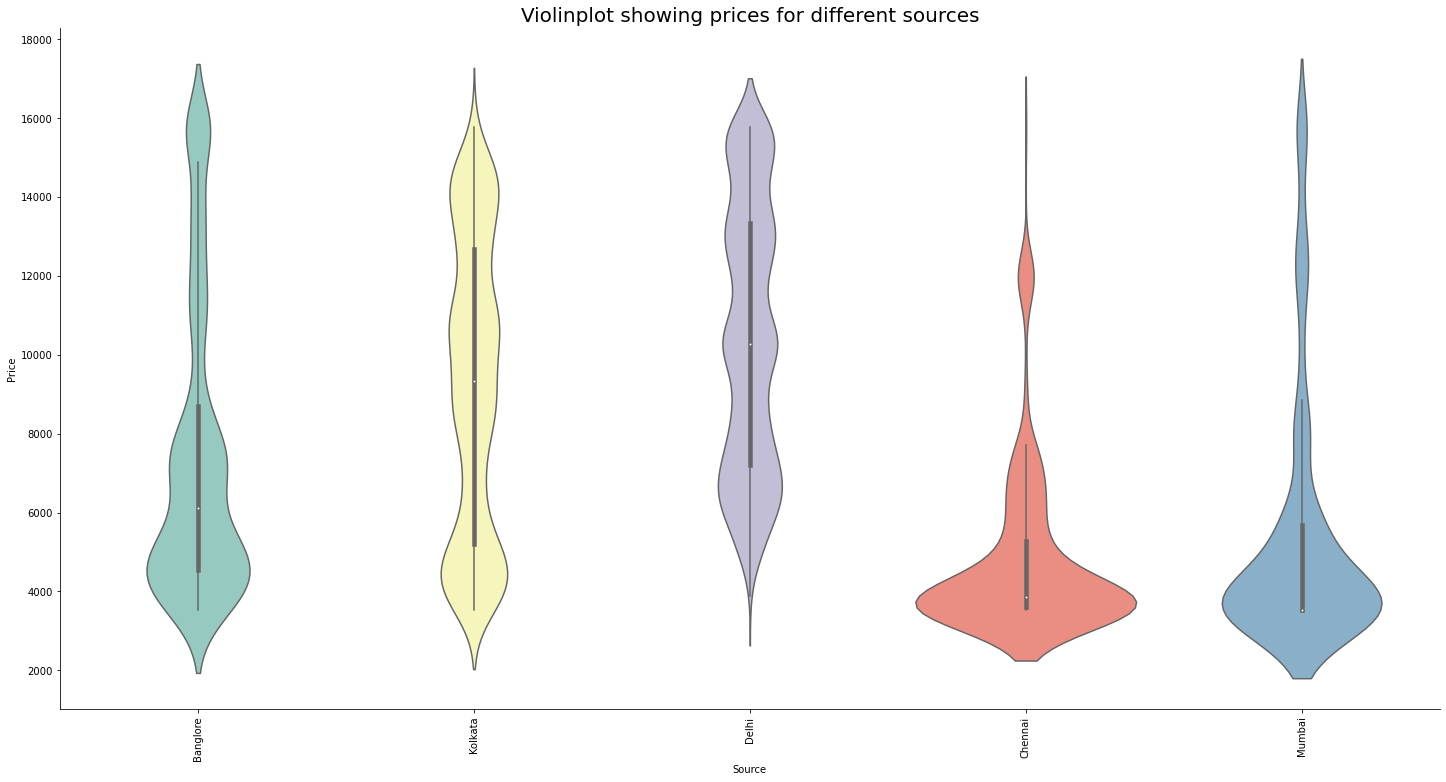

In [39]:
plot = sns.catplot(x = 'Source', y = 'Price', data = df, kind = 'violin', palette = 'Set3', height = 10, aspect = 2)
plot.set_xticklabels(rotation = 90)
plt.title('Violinplot showing prices for different sources', size = 20)

Majority of flights from Chennai and Mumbai appear to be near Rs.4000. Flights from Bangalore seem to be mostly above Rs.4000 while flights from Delhi are seen to be much expensive than the others, with majority being around Rs.7000. Also, huge amount of flights from Kolkata and Delhi seem to be above Rs.14000, with Delhi having many flights even above Rs.16000.

Text(0.5, 1.0, 'Violinplot showing prices for different destinations')

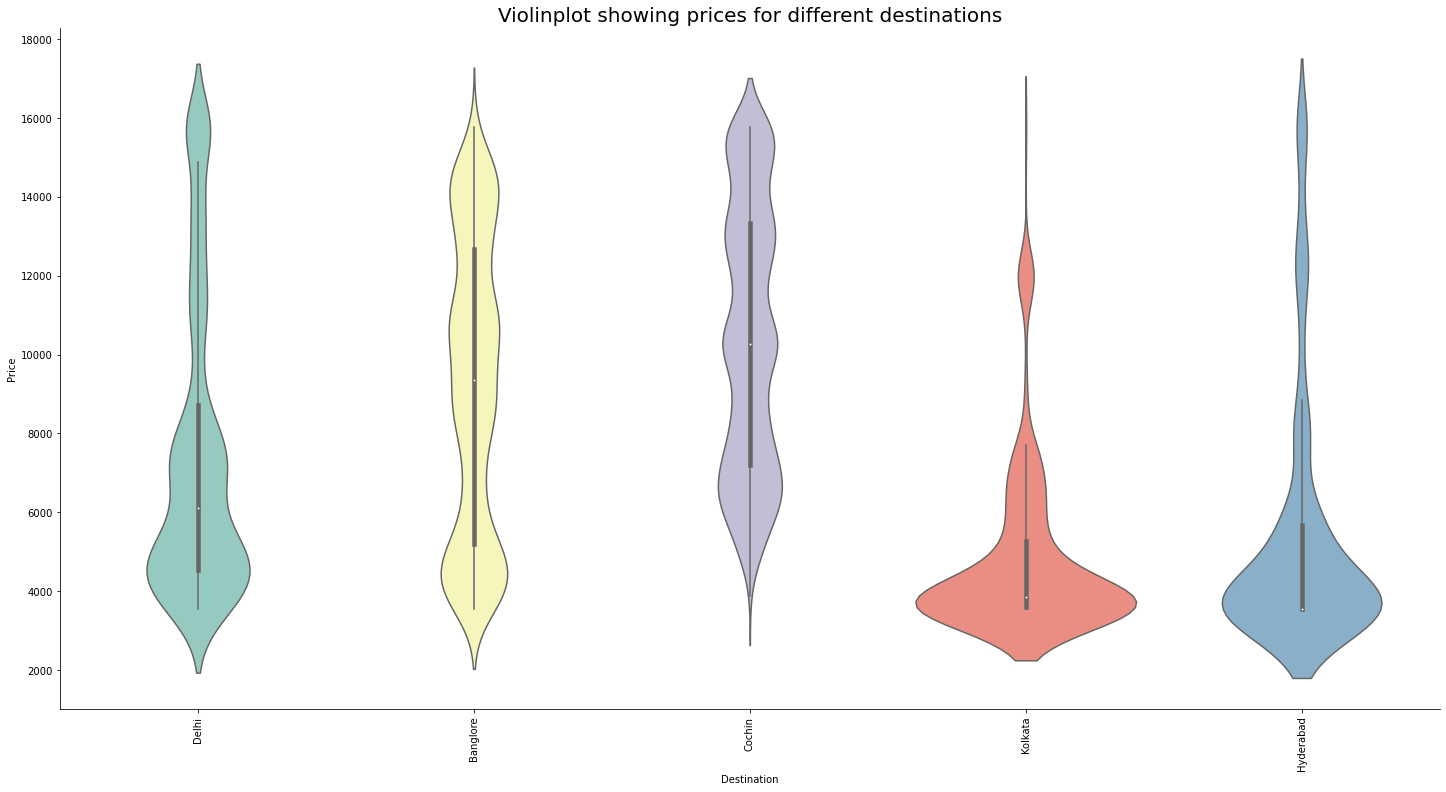

In [40]:
plot = sns.catplot(x = 'Destination', y = 'Price', data = df, kind = 'violin', palette = 'Set3', height = 10, aspect = 2)
plot.set_xticklabels(rotation = 90)
plt.title('Violinplot showing prices for different destinations', size = 20)

Flights to Delhi, Kolkata and Hyderabad seem to be comparatively less expensive, along Rs.4000 while flights to Bangalore and Cochin have varying ticket prices. Cochin seems to have much higher prices than Bangalore and the rest, with majority starting from around Rs.6000 and going upto Rs.16000.

Text(0.5, 1.0, 'Violinplot showing prices for different dates')

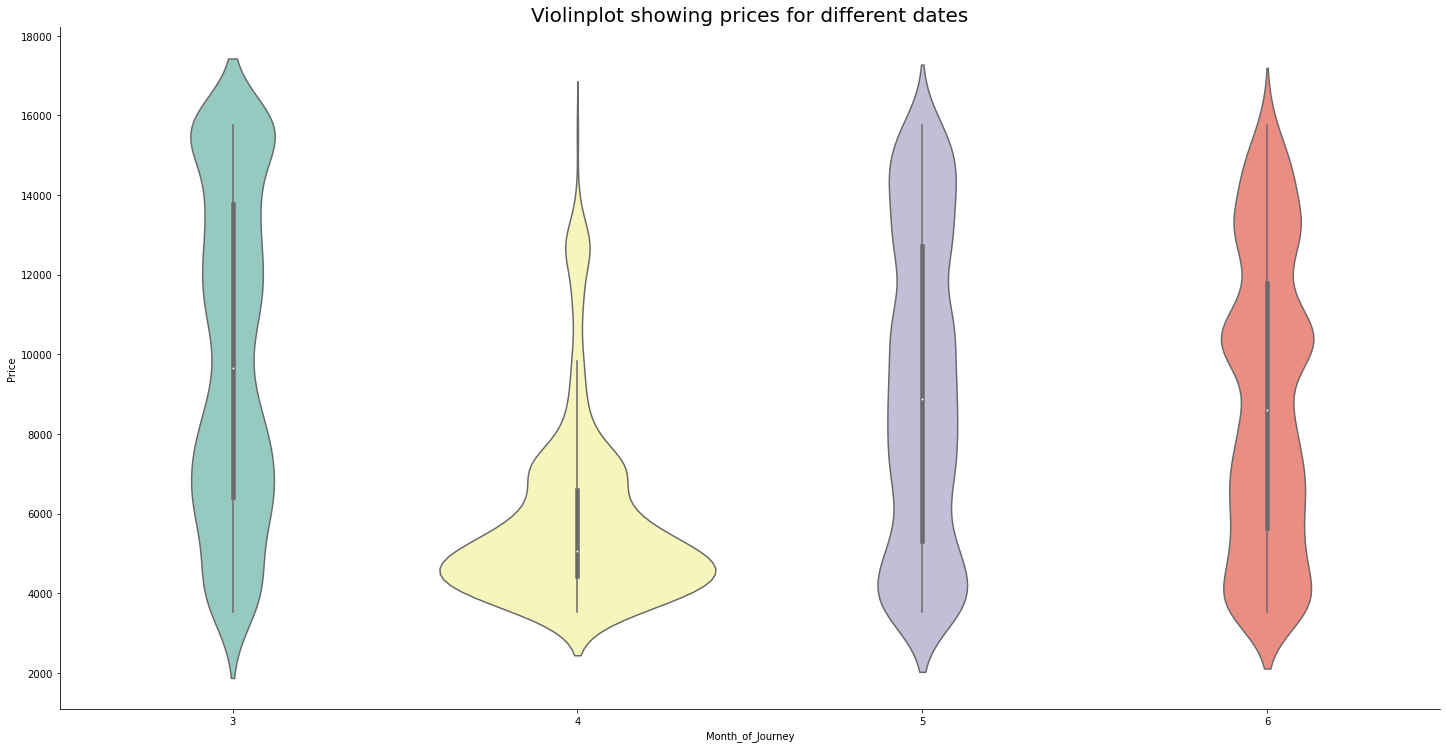

In [42]:
plot = sns.catplot(x = 'Month_of_Journey', y = 'Price', data = df, kind = 'violin', palette = 'Set3', height = 10, aspect = 2)
plt.title('Violinplot showing prices for different dates', size = 20)

We see that majority of flights booked in April were within the range of Rs.4000 and Rs.6000. Flights booked in March, May and June have prices in a large range, with March having majority flights around Rs.16000, which makes it the most expensive month of travel.

Text(0.5, 1.0, 'Violinplot showing prices for different dates')

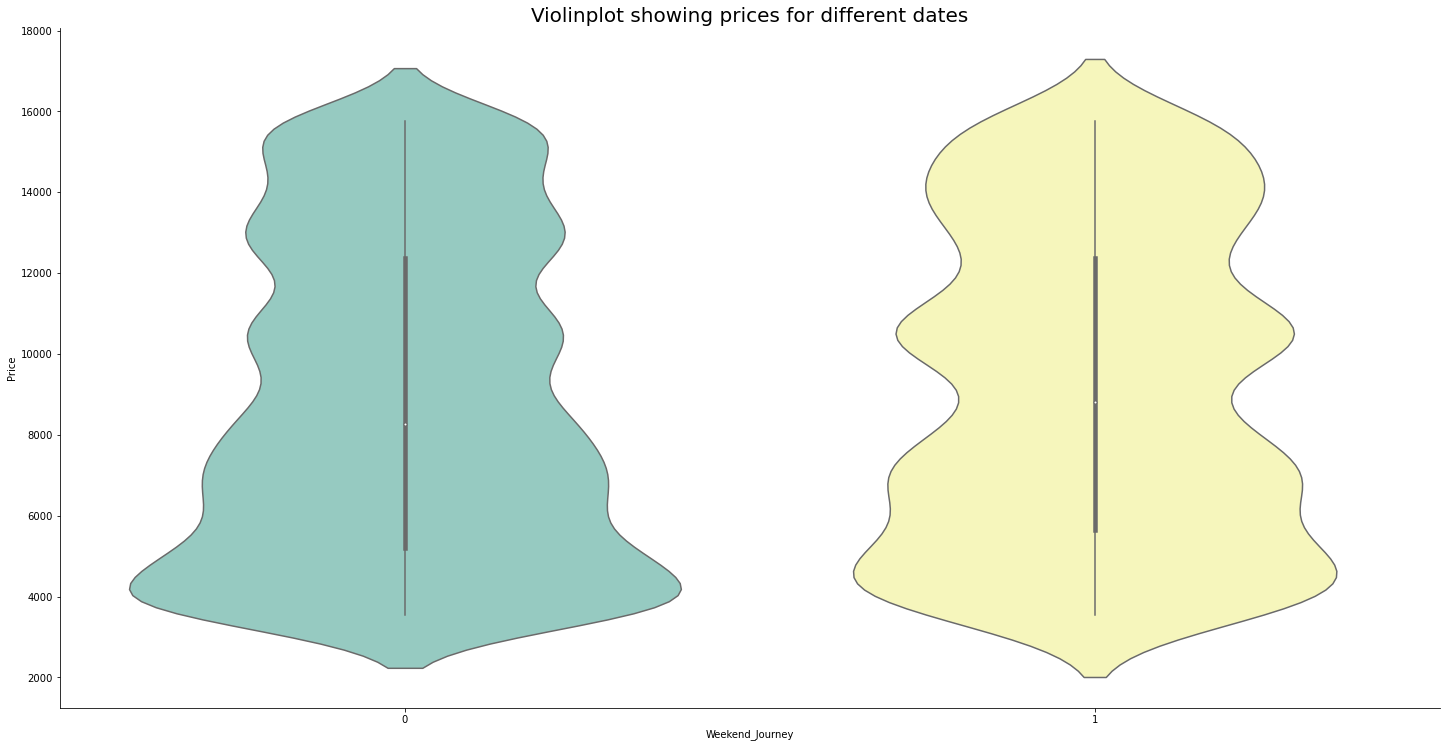

In [43]:
plot = sns.catplot(x = 'Weekend_Journey', y = 'Price', data = df, kind = 'violin', palette = 'Set3', height = 10, aspect = 2)
plt.title('Violinplot showing prices for different dates', size = 20)

Here, we see that a greater number of flights booked for a weekday travel was around Rs.4000. Number of flights with expensive prices is much larger in weekend flights than weekday flights.

Text(0.5, 1.0, 'Violinplot showing prices for different dates')

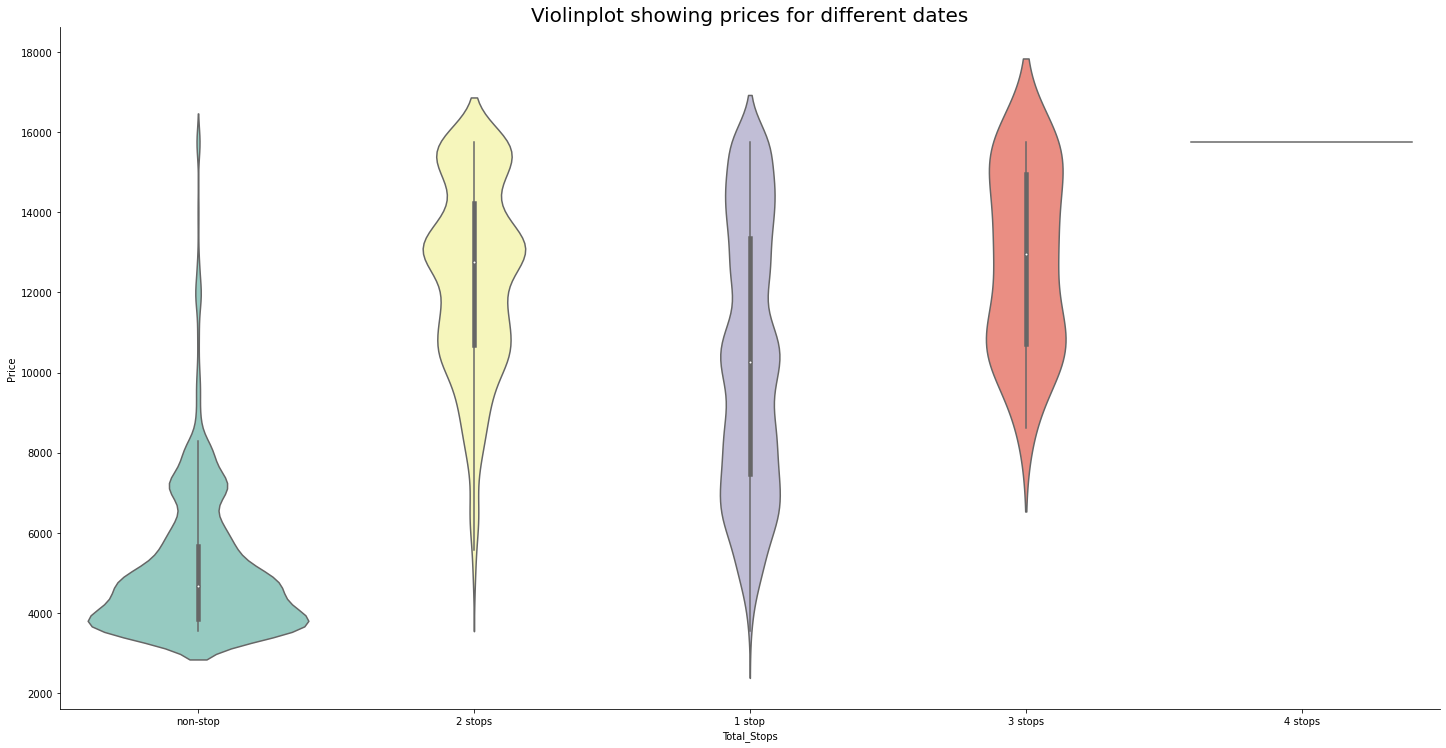

In [46]:
plot = sns.catplot(x = 'Total_Stops', y = 'Price', data = df, kind = 'violin', palette = 'Set3', height = 10, aspect = 2)
plt.title('Violinplot showing prices for different dates', size = 20)

We see that non-stop flights appear to be much less expensive than flights with stops in their route. Also, the price of the majority of flights increases with the increase in the number of stops.

Text(0.5, 1.0, 'Violinplot showing prices for different dates')

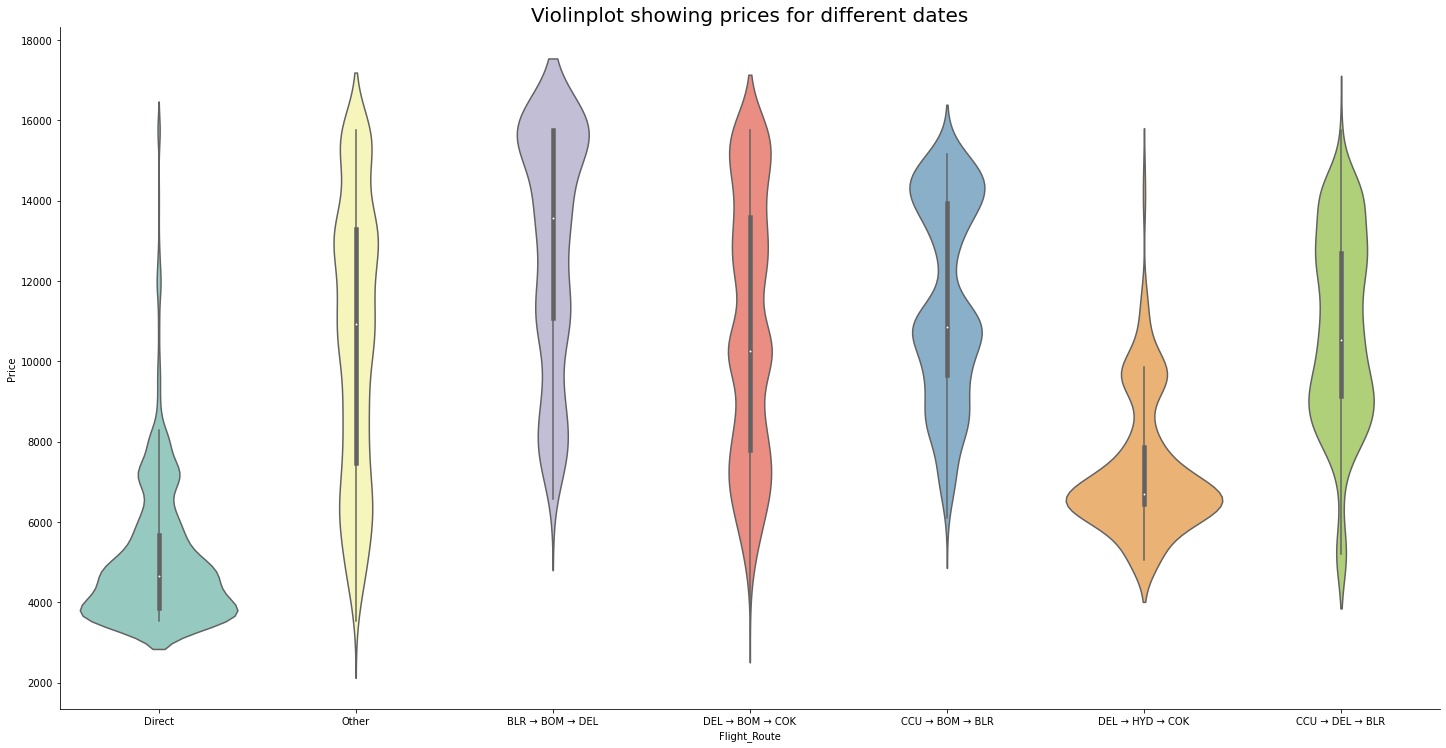

In [47]:
plot = sns.catplot(x = 'Flight_Route', y = 'Price', data = df, kind = 'violin', palette = 'Set3', height = 10, aspect = 2)
plt.title('Violinplot showing prices for different dates', size = 20)

If we consider only the named flight routes, the route _'DEL → HYD → COK'_ appears to be least expensive while _'BLR → BOM → DEL'_ seems to be the most expensive one.

Next, let us encode some of the categorical features. We start by encoding 'Total_Stops' which here is an ordinal variable i.e. the price of flight is seen to increase with each increase in the number of stops as indicated by the plot.

So, we shall encode 'Total_Stops' with the number of stops in the route.

In [48]:
### ENCODING ORDINAL CATEGORICAL VARIABLES
stops_mapper = {'non-stop': 0,
         '1 stop': 1,
         '2 stops': 2,
         '3 stops': 3,
         '4 stops': 4}
df['Total_Stops'] = df['Total_Stops'].replace(stops_mapper)
df.head(10)

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Weekend_Journey,Dep_Hour,Dep_Mins,Next_Day_Arrival,Arrival_Hour,Arrival_Mins,Duration_in_minutes,Flight_Route
0,IndiGo,Banglore,Delhi,0,3897,24,3,1,22,20,1,1,10,170,Direct
1,Air India,Kolkata,Banglore,2,7662,1,5,0,5,50,0,13,15,445,Other
2,Jet Airways,Delhi,Cochin,2,13882,9,6,1,9,25,1,4,25,1140,Other
3,IndiGo,Kolkata,Banglore,1,6218,12,5,1,18,5,0,23,30,325,Other
4,IndiGo,Banglore,Delhi,1,13302,1,3,0,16,50,0,21,35,285,Other
5,SpiceJet,Kolkata,Banglore,0,3873,24,6,0,9,0,0,11,25,145,Direct
6,Jet Airways,Banglore,Delhi,1,11087,12,3,0,18,55,1,10,25,930,BLR → BOM → DEL
7,Jet Airways,Banglore,Delhi,1,15764,1,3,0,8,0,1,5,5,1265,BLR → BOM → DEL
8,Jet Airways,Banglore,Delhi,1,11087,12,3,0,8,55,1,10,25,1530,BLR → BOM → DEL
9,Multiple carriers,Delhi,Cochin,1,8625,27,5,0,11,25,0,19,15,470,DEL → BOM → COK


Next, we shall rename the top five routes as Route_1 to Route_5 respectively. We also rename the 'Flight_Route' feature as simply 'Route'.

In [49]:
# Renaming route names
df['Flight_Route'] = df['Flight_Route'].replace(['DEL → BOM → COK', 'CCU → BOM → BLR', 'CCU → DEL → BLR', 'BLR → BOM → DEL',
                                                'DEL → HYD → COK'], ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'])
df = df.rename(columns = {'Flight_Route': 'Route'})
df.head(10)

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Weekend_Journey,Dep_Hour,Dep_Mins,Next_Day_Arrival,Arrival_Hour,Arrival_Mins,Duration_in_minutes,Route
0,IndiGo,Banglore,Delhi,0,3897,24,3,1,22,20,1,1,10,170,Direct
1,Air India,Kolkata,Banglore,2,7662,1,5,0,5,50,0,13,15,445,Other
2,Jet Airways,Delhi,Cochin,2,13882,9,6,1,9,25,1,4,25,1140,Other
3,IndiGo,Kolkata,Banglore,1,6218,12,5,1,18,5,0,23,30,325,Other
4,IndiGo,Banglore,Delhi,1,13302,1,3,0,16,50,0,21,35,285,Other
5,SpiceJet,Kolkata,Banglore,0,3873,24,6,0,9,0,0,11,25,145,Direct
6,Jet Airways,Banglore,Delhi,1,11087,12,3,0,18,55,1,10,25,930,Route_4
7,Jet Airways,Banglore,Delhi,1,15764,1,3,0,8,0,1,5,5,1265,Route_4
8,Jet Airways,Banglore,Delhi,1,11087,12,3,0,8,55,1,10,25,1530,Route_4
9,Multiple carriers,Delhi,Cochin,1,8625,27,5,0,11,25,0,19,15,470,Route_1


Finally, in order to make models, we shall one hot encode the categorical variables to get binary features which are easier to work with. We shall turn the features 'Airline', 'Source', 'Destination' and 'Route' to binary and drop one of each of their levels to serve as reference.

In [50]:
### ONE-HOT ENCODING NOMINAL CATEGORICAL VARIABLES
df_final = pd.get_dummies(df, columns = ['Airline', 'Source', 'Destination', 'Route'], drop_first = True)

Here's a look at the final dataframe that will be used for model building.

In [51]:
df_final.head(10)

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Weekend_Journey,Dep_Hour,Dep_Mins,Next_Day_Arrival,Arrival_Hour,Arrival_Mins,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Route_Other,Route_Route_1,Route_Route_2,Route_Route_3,Route_Route_4,Route_Route_5
0,0,3897,24,3,1,22,20,1,1,10,...,0,1,0,0,0,0,0,0,0,0
1,2,7662,1,5,0,5,50,0,13,15,...,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,1,9,25,1,4,25,...,1,0,0,0,1,0,0,0,0,0
3,1,6218,12,5,1,18,5,0,23,30,...,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,0,16,50,0,21,35,...,0,1,0,0,1,0,0,0,0,0
5,0,3873,24,6,0,9,0,0,11,25,...,0,0,0,0,0,0,0,0,0,0
6,1,11087,12,3,0,18,55,1,10,25,...,0,1,0,0,0,0,0,0,1,0
7,1,15764,1,3,0,8,0,1,5,5,...,0,1,0,0,0,0,0,0,1,0
8,1,11087,12,3,0,8,55,1,10,25,...,0,1,0,0,0,0,0,0,1,0
9,1,8625,27,5,0,11,25,0,19,15,...,1,0,0,0,0,1,0,0,0,0


Lastly, we'll construct a correlation matrix to see if any of the continuous features are highly correlated to each other.

<AxesSubplot:>

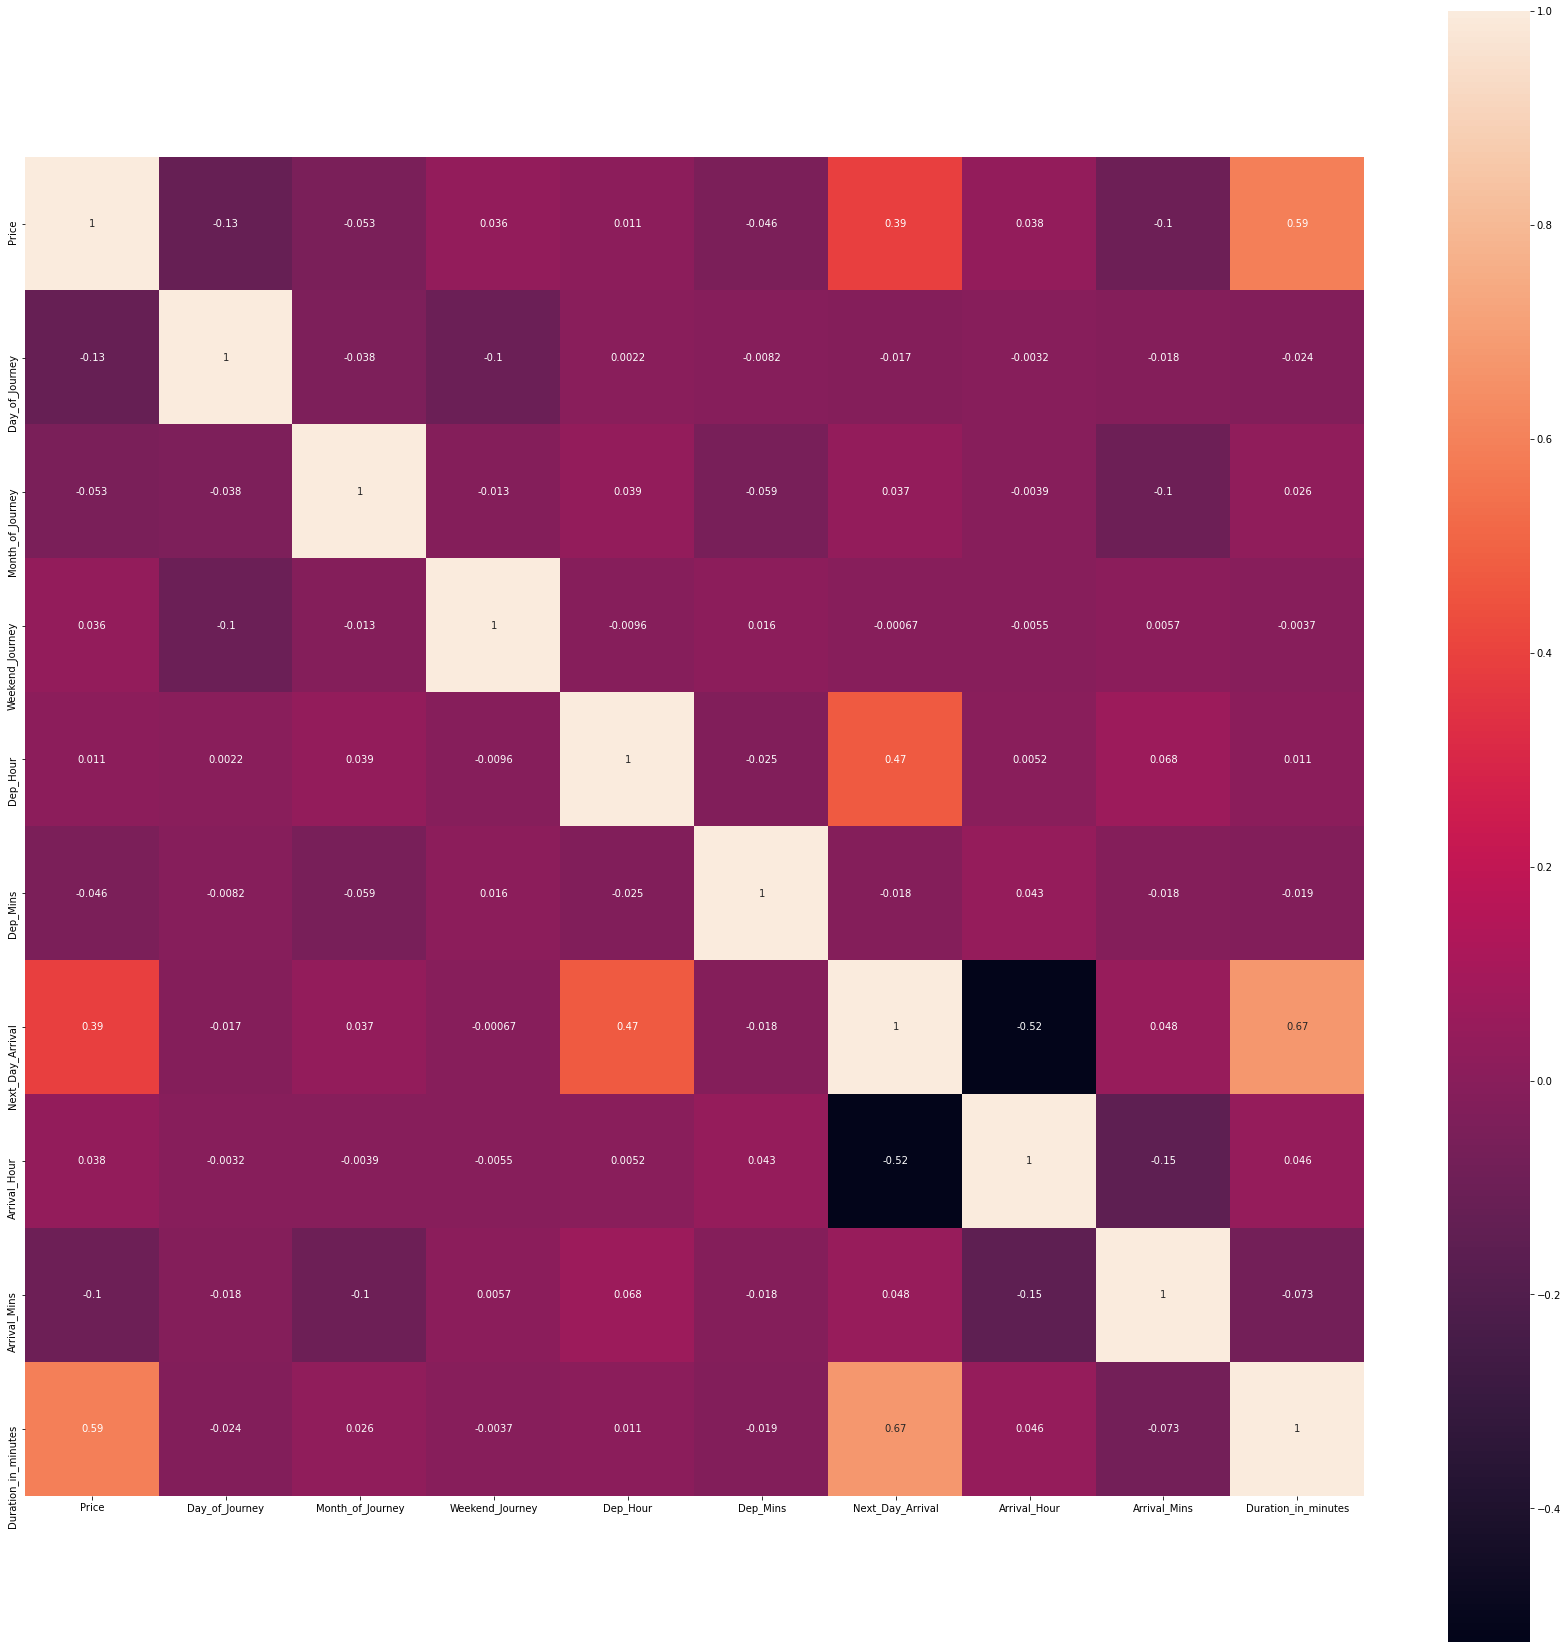

In [52]:
### CREATING CORRELATION MATRIX
plt.figure(figsize = (30, 30))
sns.heatmap(df_final[num_vars.columns].corr(), annot = True, fmt = '.2g', square = True)

If we take anything greater than 0.5 as a high correlation then we see that the duration and next day arrival are highly correlated which seems logical if we think about it. Also, the price has high correlation with the duration in minutes. 

If we wish, we can remove some of these highly correlated variables. However, we shall keep all of them intact and use this final dataframe to create predictive models.